In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from tqdm import tqdm

In [2]:
from pymongo import MongoClient
from pymongo.cursor import CursorType

host = '192.168.1.7'
port = '27017'
mongo = MongoClient(host, int(port))
print(mongo)

MongoClient(host=['192.168.1.7:27017'], document_class=dict, tz_aware=False, connect=True)


In [3]:
def find_item_one(mongo, condition=None, db_name=None, collection_name=None):
    result = mongo[db_name][collection_name].find_one(condition, {"_id": False})
    return result

def find_item(mongo, condition=None, db_name=None, collection_name=None):
    result = mongo[db_name][collection_name].find(condition, {"_id": False}, no_cursor_timeout=True)
    return result

In [4]:
cursor = find_item(mongo, None,'twitter','tw')

In [5]:
text = []
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
for i in tqdm(cursor):
    text.append(i['text'])

446859it [00:10, 41271.36it/s]


In [6]:
df = pd.DataFrame()
df['text'] = text

In [7]:
df

,text
0,"@EdgArM_SBC (기세등등!) 선배도 잘 어울려, (흠… 당신을 뚫어지라 보다..."
1,"RT @5thminmin: 🐿나는 본가에서 잉꼬를 키우고 있어, 엄마나 여동생이 찍..."
2,RT @wnxxjk: 칭찬 받아서 기분 좋은 토깽이(*●⁰ꈊ⁰●)💜\n#정국 #JU...
3,RT @specialyunho: 아 진짜 연기 이야기 되게 많이 해주시네요 \n기분...
4,"@Napu_napu_13 세상에나,, 어쩌다 보게된것도 우연히 마주치게된 상황일거 ..."
...,...
446854,RT @soyaalways: 2016년 8월에 런쥔이 학교 선배님이 올리셨던 글인데...
446855,@PITAPAT__DY 사는건 좋은데... 할 거면 다른 비즈키링 그런걸 하라고.....
446856,엔시티2020 콜렉트북 콜북 교환\n\n저 : 쿤\n💚 : 127 드림 성찬 아무나...
446857,RT @Jochung_1234: 갑자기 보디가드 10명이 우리 집에 들이닥치더니 아...


In [8]:
df.drop_duplicates(subset=['text'], inplace=True)
df = df.dropna(how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168700 entries, 0 to 446856
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    168700 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [24]:
df = df[:int(166650/2)]

In [25]:
df['text'] = df['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', " ")

In [26]:
df.head()

,text
0,기세등등 선배도 잘 어울려 흠 당신을 뚫어지라 보다...
1,나는 본가에서 잉꼬를 키우고 있어 엄마나 여동생이 찍...
2,칭찬 받아서 기분 좋은 토깽이 정국 ...
3,아 진짜 연기 이야기 되게 많이 해주시네요 기분 ...
4,세상에나 어쩌다 보게된것도 우연히 마주치게된 상황일거 ...


In [27]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [28]:
from konlpy.tag import Okt

okt = Okt()

In [29]:
X_train = []

for sentence in tqdm(df['text']):
    temp_X = []
    temp_X = okt.morphs(sentence, norm=True, stem=True)
    temp_X = [w for w in temp_X if not w in stopwords]
    X_train.append(temp_X)

100%|████████████████████████████████████████████████████████████████████████████| 83325/83325 [20:15<00:00, 68.53it/s]


In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [34]:
threshold = 3 # 임계점
total_cnt = len(tokenizer.word_index) # 단어 개수

rare_cnt = 0  # 등장 빈도가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총합

rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 빈도수의 총합

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if value < threshold:
    rare_cnt +=1 # 희소 단어의 개수
    rare_freq = rare_freq + value

print('단어 집합의 크기 : ', total_cnt)
print('등장 빈도가 2번 이하인 희귀 단어의 수 : ',rare_cnt)
print('단어 집합에서 희귀 단어의 비율 : {:.3f}%'.format((rare_cnt/total_cnt)*100))
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : {:.3f}'.format((rare_freq/total_freq)*100))

단어 집합의 크기 :  47646
등장 빈도가 2번 이하인 희귀 단어의 수 :  27132
단어 집합에서 희귀 단어의 비율 : 56.945%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 2.671


In [35]:
tokenizer.word_counts

OrderedDict([('기세', 25),
             ('등등', 88),
             ('선배', 278),
             ('자다', 3448),
             ('어울리다', 201),
             ('흠', 75),
             ('당신', 1608),
             ('을', 12131),
             ('뚫어지다', 15),
             ('보다', 10710),
             ('묶다', 54),
             ('머리', 785),
             ('그렇다', 5414),
             ('귀걸이', 27),
             ('아주', 429),
             ('화려하다', 29),
             ('그', 5018),
             ('친구', 1284),
             ('아마', 162),
             ('까마귀', 11),
             ('이야기', 797),
             ('듯', 922),
             ('가다', 3030),
             ('타다', 588),
             ('않다', 3659),
             ('나', 10797),
             ('본가', 18),
             ('에서', 4621),
             ('잉꼬', 1),
             ('키우다', 189),
             ('있다', 11267),
             ('엄마', 561),
             ('여동생', 16),
             ('찍다', 594),
             ('보내다', 1084),
             ('사진', 994),
             ('이나', 717),
             ('동영상', 43),

In [38]:
# 리뷰 길이에 대한 분포 시각화
print('리뷰의 최대 길이 : ', max(len(i) for i in X_train))
print('리뷰의 평균 길이 : ', sum(map(len, X_train)) / len(X_train))

리뷰의 최대 길이 :  73
리뷰의 평균 길이 :  15.434887488748874


In [39]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if len(s) <= max_len:
      cnt = cnt+1
  print('전체 샘플 중 길이가 {}이하인 샘플의 비율 : {}'.format(max_len, (cnt/len(nested_list)*100)))

In [40]:
below_threshold_len(30 ,X_train)
below_threshold_len(40 ,X_train)
below_threshold_len(50 ,X_train)

전체 샘플 중 길이가 30이하인 샘플의 비율 : 83.91599159915991
전체 샘플 중 길이가 40이하인 샘플의 비율 : 98.2058205820582
전체 샘플 중 길이가 50이하인 샘플의 비율 : 99.97839783978398


In [45]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 20516


In [46]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [48]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [49]:
X_train = np.delete(X_train, drop_train, axis=0)
print(len(X_train))

78287


리뷰의 최대 길이 : 73
리뷰의 평균 길이 : 16.428168150523074


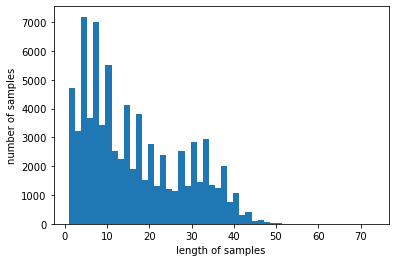

In [50]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [52]:
X_train = pad_sequences(X_train, maxlen = 40)

In [61]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.
